In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

In [ ]:
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)

train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Normal heartbeat data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#Abnormal heartbeat data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

print(n_train_data)

tf.Tensor(
[[0.57030463 0.46561658 0.29058117 ... 0.48504233 0.4233502  0.47598344]
 [0.48320588 0.28246963 0.16471253 ... 0.567567   0.4677294  0.2692329 ]
 [0.48144642 0.35151404 0.25972766 ... 0.5479421  0.5077544  0.54298663]
 ...
 [0.41039047 0.24164985 0.13120876 ... 0.5277313  0.5654091  0.5023885 ]
 [0.5397748  0.4140786  0.28101394 ... 0.51266515 0.43706053 0.4426865 ]
 [0.29639772 0.15988176 0.18883787 ... 0.53766966 0.545786   0.40826708]], shape=(2359, 140), dtype=float32)


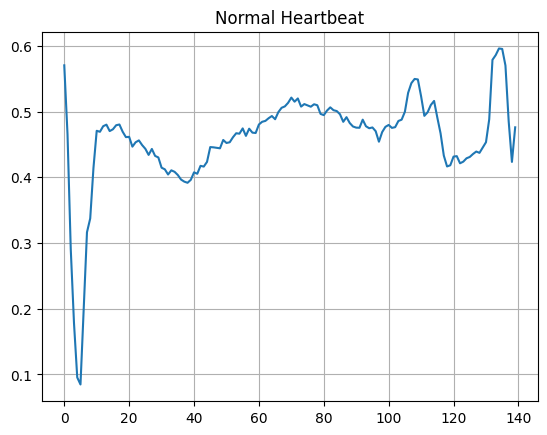

In [ ]:
plt.plot(np.arange(140), n_train_data[0])
plt.grid()
plt.title('Normal Heartbeat')
plt.show()

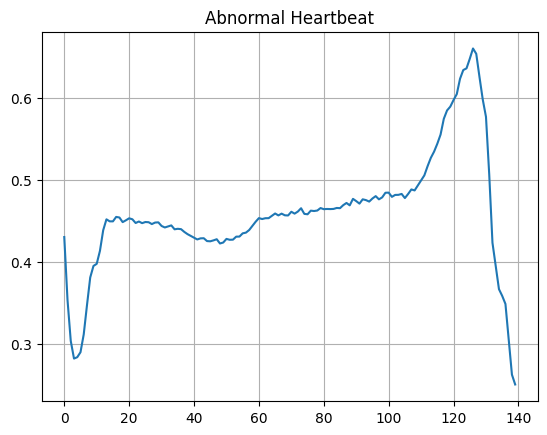

In [ ]:
plt.plot(np.arange(140), an_train_data[0])
plt.grid()
plt.title('Abnormal Heartbeat')
plt.show()

In [ ]:
autoencoder = detector()
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(n_train_data, n_train_data, epochs = 20, batch_size=512, validation_data=(n_test_data, n_test_data))

Epoch 1/20
5/5 [==============================] - 2s 68ms/step - loss: 0.0576 - val_loss: 0.0557
Epoch 2/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0546 - val_loss: 0.0525
Epoch 3/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0511 - val_loss: 0.0486
Epoch 4/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0471 - val_loss: 0.0445
Epoch 5/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0431 - val_loss: 0.0405
Epoch 6/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0391 - val_loss: 0.0367
Epoch 7/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0356 - val_loss: 0.0336
Epoch 8/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0327 - val_loss: 0.0311
Epoch 9/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0304 - val_loss: 0.0290
Epoch 10/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0284 - val_loss: 0.0272
Epoch 11/20
5/5 [============

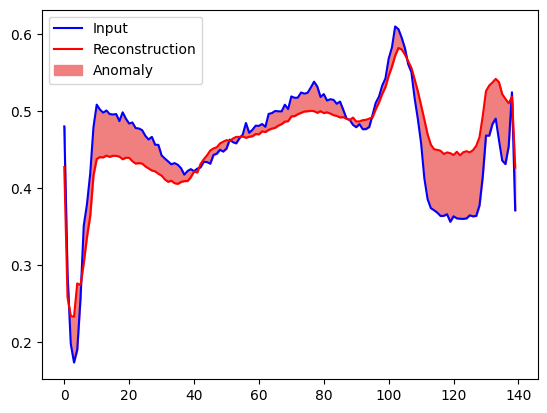

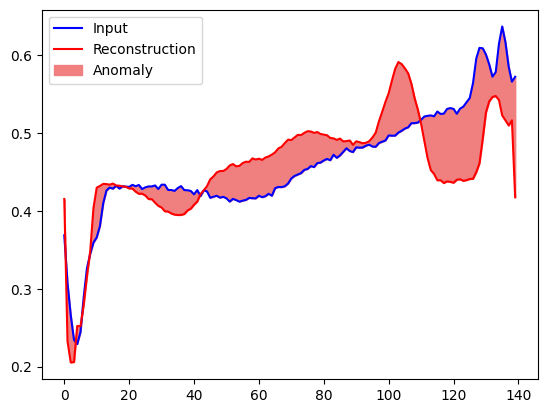

In [ ]:
def plot(data, n):
  enc_img = autoencoder.encoder(data)
  dec_img = autoencoder.decoder(enc_img)
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Anomaly'])
  plt.show()

plot(n_test_data, 0)
plot(an_test_data, 0)

In [ ]:
reconstructed = autoencoder(n_train_data)
train_loss = losses.mae(reconstructed, n_train_data)
t = np.mean(train_loss) + np.std(train_loss)

def prediction(model, data, threshold):
  rec = model(data)
  loss = losses.mae(rec, data)
  return tf.math.less(loss, threshold)
print(t)
pred = prediction(autoencoder, n_test_data, t)
print(pred)

0.032711644
tf.Tensor(
[False  True  True False  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  Tr

In [ ]:
threshold = np.mean(train_loss) + 2*np.std(train_loss)
preds = tf.math.less(train_loss, threshold)
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=2241>

In [ ]:
preds.shape

TensorShape([2359])

In [ ]:
acc = 2240/2359*100
print("Accuracy = ", acc, "%")

Accuracy =  94.95548961424333 %


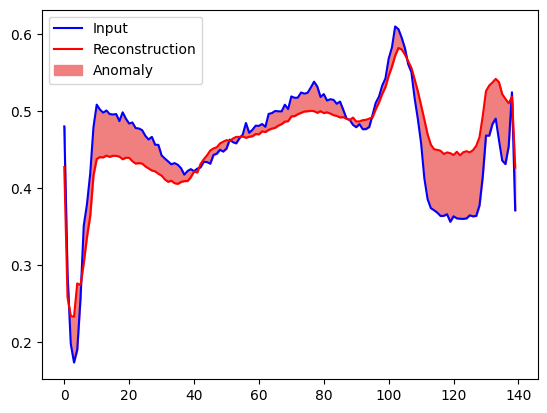

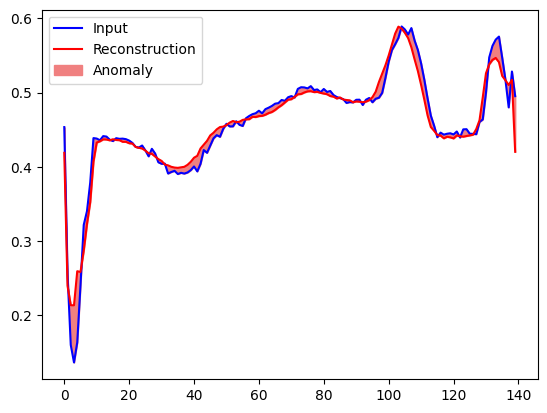

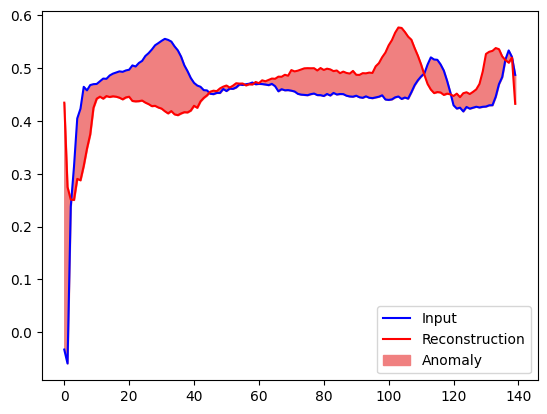

In [ ]:
plot(n_test_data, 0)
plot(n_test_data, 1)
plot(n_test_data, 3)